# Car selling price and odometer
--------
### Analsisy step
1. Generate a scatter plot of odometer vs selling price
2. Create selected dataframe that includes only make with over 10,000 data rows to be more accurate analysis.
3. check the average selling price of each manufacturer, then compare the following two scatter plot. 
      - scatter plot between Odometer and Selling price for the top 3 manufacturers in terms of average price
      - scatter plot between Odometer and Selling price for the bottom 3 manufacturers
# Conclusion
1. odometer and selling price are inversely proportional.
2. Even if it was expensive when just purchased, after 100,000 miles, the value is about the same level as a less expensive manufacturer.re.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

str_path_file = "data/clean_car_prices/clean_car_prices.csv"
car_prices = pd.read_csv(str_path_file)

In [4]:
car_prices

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [6]:
# Create a DataFrame with columns: make, model, condition, odometer, mmr, sellingprice
car_value_df=car_prices[["make", "model", "condition","odometer","mmr", "sellingprice"]]

#drop row if make is null
car_value_no_null_df=car_value_df.dropna(subset=['make'], inplace=False)

#count the number of rows by make 
car_value_make_df=car_value_no_null_df.groupby("make").count()
Car_value_make_data_count=car_value_make_df.sort_values(by="model",ascending=False).head(30)

Car_value_make_data_count

,model,condition,odometer,mmr,sellingprice
make,,,,,
Ford,93554,92103,93534,93553,93553
Chevrolet,60197,58870,60183,60197,60197
Nissan,53946,53132,53944,53946,53946
Toyota,39871,39001,39863,39871,39871
Dodge,30710,30115,30708,30708,30708
Honda,27206,26382,27200,27206,27206
Hyundai,21816,21484,21816,21811,21811
BMW,20633,20308,20716,20719,20719
Kia,18077,17872,18075,18075,18075


In [116]:
##drop row if sellingprice is null
car_value_dropna_price_df=car_value_no_null_df.dropna(subset=['sellingprice'], inplace=False)


In [125]:
car_value_make_df = car_value_no_null_df.groupby("make").mean(numeric_only=True)

car_value_make_df.head(40).sort_values(by="sellingprice",ascending=True).head(10)

#note the followings are excluded from this analysis because of the follwoing reasons. 
#Daewoo:
#Geo

,condition,odometer,mmr,sellingprice
make,,,,
Daewoo,18.000000,78270.666667,633.333333,400.000000
Geo,5.894737,177356.736842,609.210526,528.947368
Oldsmobile,16.282282,139822.480769,1095.054945,954.189560
Isuzu,18.260638,140132.225490,1750.857843,1709.196078
Pontiac,23.224499,117825.348987,3952.407160,3755.342673
Mercury,24.277573,113475.936181,4103.313253,3935.567269
Mitsubishi,28.606948,75600.746377,8317.608696,8201.565942
Plymouth,27.687500,80449.800000,11170.000000,9592.500000
Mazda,30.150740,65365.987681,10278.477039,10155.641234


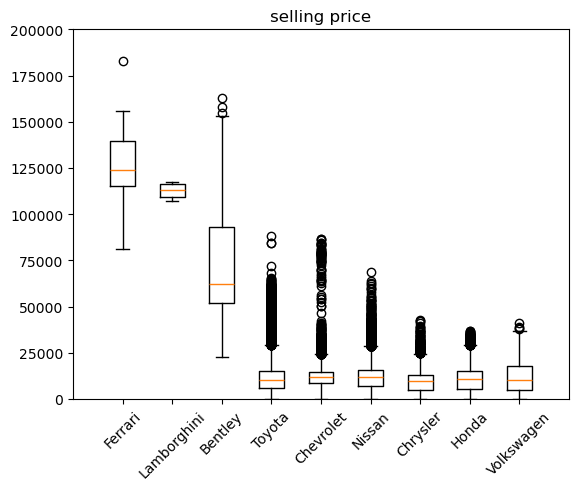

In [149]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

#put make which have over 10,000 rows into a list for loop
make_list=["Ferrari","Lamborghini","Bentley", #Make with only Luxury line
           "Chevrolet","Nissan","Toyota",  #　Make with wide range car from Luxury to economy,
           "Volkswagen","Honda","Chrysler",  #Make with economy line
          ]

#create empty list to fill selling price data for plotting
selling_price_list=[]

for make in make_list:
    price_data=car_value_dropna_price_df[car_value_dropna_price_df['make'] == make]["sellingprice"]
    selling_price_list.append(price_data)
    
    quartiles = price_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = price_data[(price_data < lower_bound) | (price_data > upper_bound)]



# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(selling_price_list,labels=make_list)

# Sort the labels in descending order of average price
sorted_make_list = [make for _, make in sorted(zip([price.mean() for price in selling_price_list], make_list), reverse=True)]
plt.xticks(range(1, len(make_list) + 1), sorted_make_list, rotation=45)

plt.title("selling price")

plt.xlim(0, len(make_list) + 1)
plt.ylim(0,200000)
plt.savefig('sellingprice_boxplot.png',bbox_inches='tight')

plt.show()

In [136]:
#put make which have over 10,000 rows into a list 
make_list=["Ford","Chevrolet","Nissan","Toyota","Dodge","Honda","Hyundai","BMW","Kia","Chrysler","Mercedes-Benz","Jeep","Infiniti","Volkswagen","Lexus","GMC"]

#empty list to append data of each make
selected_make = []

for make in make_list:

    #filter the dataframe to get data for the selected make
    selected_make_data=car_value_dropna_price_df[car_value_dropna_price_df["make"]==make]
    selected_make.append(selected_make_data)

#create new dataframe by merging each dataframe per make
selected_make_df = pd.concat(selected_make)

car_value_make_df = selected_make_df.groupby("make").mean(numeric_only=True)

car_value_make_df.head(40).sort_values(by="sellingprice",ascending=True).head(20)

,condition,odometer,mmr,sellingprice
make,,,,
Volkswagen,29.389277,66699.825358,9525.569494,9383.704316
Honda,29.298916,80331.697279,11001.945343,10940.432588
Hyundai,32.142744,51178.629591,11232.340333,11010.631608
Chrysler,25.545062,65530.561545,11415.909749,11167.249392
Dodge,26.985322,72500.066860,11417.359483,11206.802592
Nissan,31.997309,56219.019761,11867.478126,11739.015960
Kia,33.667264,46015.827754,11946.834025,11808.672918
Chevrolet,27.717955,76896.387817,12150.630430,11977.397528
Toyota,30.624958,73971.185811,12359.001530,12249.321813


Text(0.5, 1.0, 'odometer vs selling price')

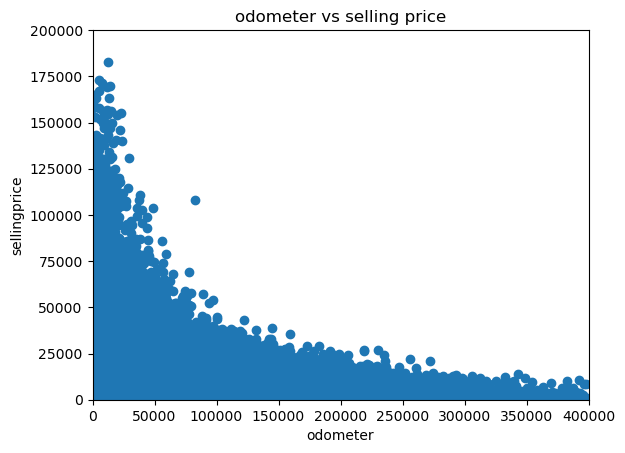

In [43]:
#Generate a scatter plot of odometer vs selling price
plt.scatter(car_value_no_null_df["odometer"],car_value_no_null_df["sellingprice"])
plt.xlabel("odometer")
plt.ylabel("sellingprice")
plt.ylim(0,200000)
plt.xlim(0,400000)
plt.title("odometer vs selling price")
#create inverse proportion??

Text(0, 0.5, 'mmr')

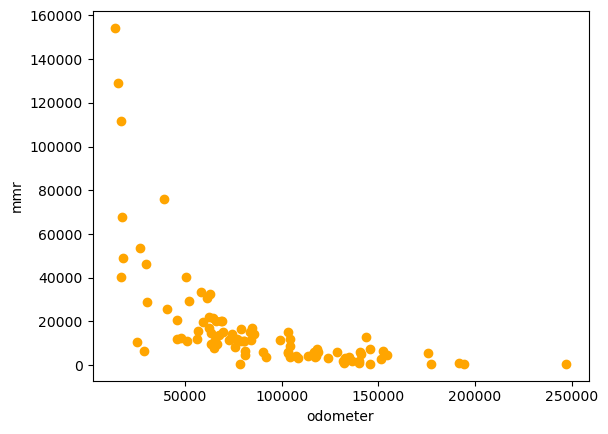

In [11]:
#Generate a scatter plot of odometer vs selling price

plt.scatter(car_value_make_df["odometer"],car_value_make_df["mmr"],color='orange')
plt.xlabel("odometer")
plt.ylabel("mmr")

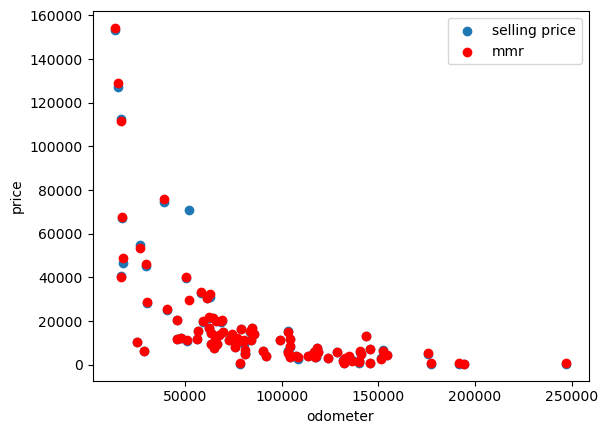

In [50]:
# 2 scatter plots into 1 scatter plot
plt.scatter(car_value_make_df["odometer"],car_value_make_df["sellingprice"],label="selling price")
plt.scatter(car_value_make_df["odometer"],car_value_make_df["mmr"],label="mmr",color='red')
plt.xlabel("odometer")
plt.ylabel("price")
plt.legend()

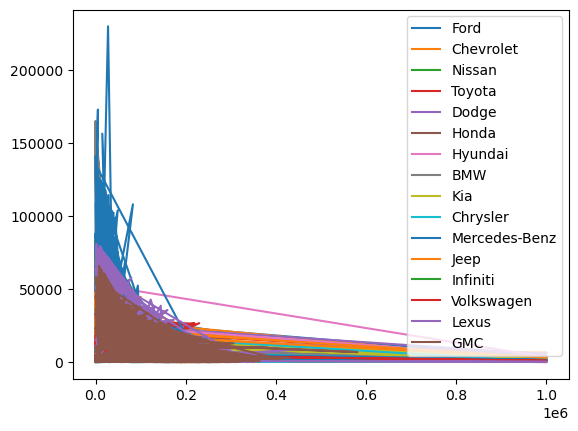

In [13]:
#put make which have over 10,000 rows into a list 
make_list=["Ford","Chevrolet","Nissan","Toyota","Dodge","Honda","Hyundai","BMW","Kia","Chrysler","Mercedes-Benz","Jeep","Infiniti","Volkswagen","Lexus","GMC"]

#create empty list to fill odometer

for make in make_list:

    #filter the dataframe to get data for the selected make
    selected_data=car_value_no_null_df[car_value_no_null_df["make"]==make]
    
    #extract odometer and selling price data
    x_axis=selected_data["odometer"]
    y_axis=selected_data["sellingprice"]
    
    plt.plot(x_axis,y_axis,label=make)
    plt.legend()
    plt.show

(0.0, 400000.0)

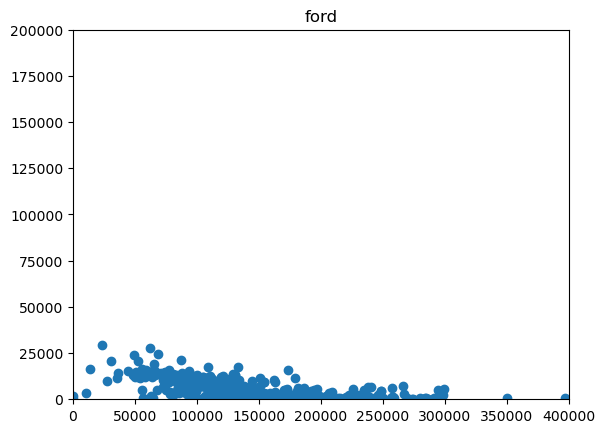

In [44]:
selected_data=car_value_no_null_df[car_value_no_null_df["make"]=="ford"]
    
#extract odometer and selling price data
x_axis=selected_data["odometer"]
y_axis=selected_data["sellingprice"]
plt.scatter(x_axis,y_axis)
plt.title("ford")
plt.ylim(0,200000)
plt.xlim(0,400000)

(0.0, 400000.0)

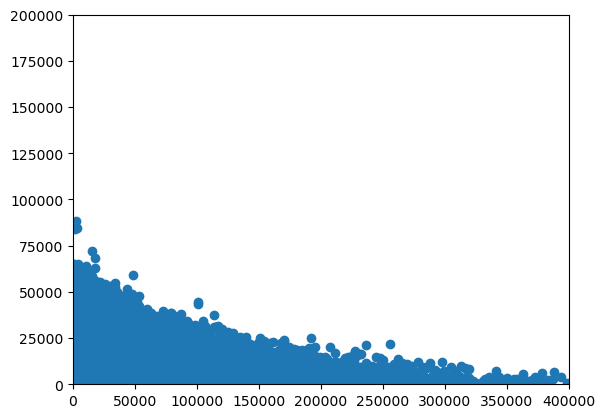

In [49]:
selected_data=car_value_no_null_df[car_value_no_null_df["make"]=="Chevrolet"]
    
#extract odometer and selling price data
x_axis=selected_data["odometer"]
y_axis=selected_data["sellingprice"]
plt.scatter(x_axis,y_axis)
plt.ylim(0,200000)
plt.xlim(0,400000)

(0.0, 400000.0)

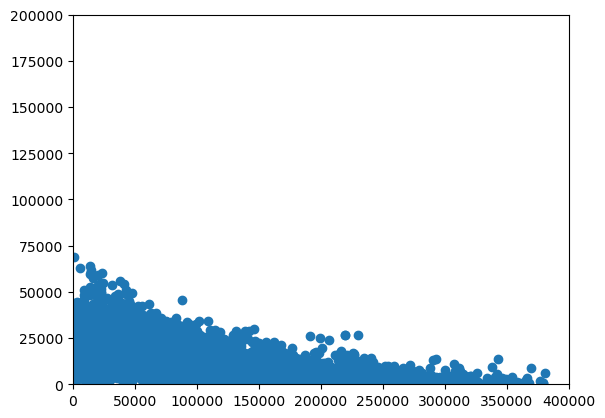

In [48]:
selected_data=car_value_no_null_df[car_value_no_null_df["make"]=="Toyota"]
    
#extract odometer and selling price data
x_axis=selected_data["odometer"]
y_axis=selected_data["sellingprice"]
plt.scatter(x_axis,y_axis)
plt.ylim(0,200000)
plt.xlim(0,400000)

(0.0, 400000.0)

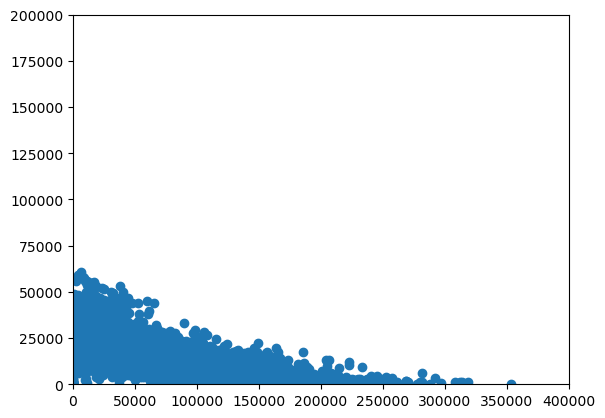

In [47]:
selected_data=car_value_no_null_df[car_value_no_null_df["make"]=="Jeep"]
    
#extract odometer and selling price data
x_axis=selected_data["odometer"]
y_axis=selected_data["sellingprice"]
plt.scatter(x_axis,y_axis)
plt.ylim(0,200000)
plt.xlim(0,400000)

(0.0, 400000.0)

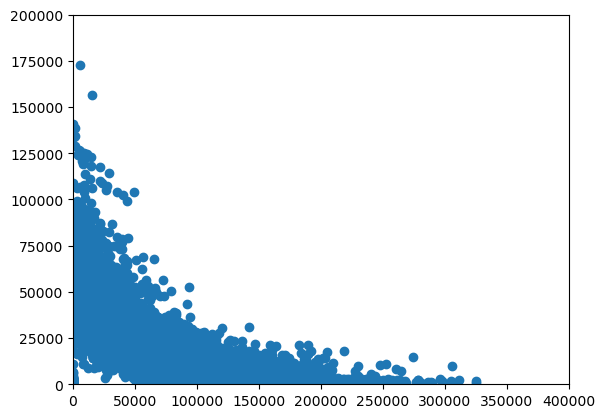

In [46]:
selected_data=car_value_no_null_df[car_value_no_null_df["make"]=="Mercedes-Benz"]
    
#extract odometer and selling price data
x_axis=selected_data["odometer"]
y_axis=selected_data["sellingprice"]
plt.scatter(x_axis,y_axis)
plt.ylim(0,200000)
plt.xlim(0,400000)

In [80]:
regress_values

357      NaN
362      NaN
372      NaN
384      NaN
385      NaN
          ..
558775   NaN
558798   NaN
558807   NaN
558816   NaN
558822   NaN
Name: odometer, Length: 17141, dtype: float64

In [85]:
x_axis.isnull().sum()

3

In [86]:
y_axis.isnull().sum()

0

In [82]:
linregress(x_axis,y_axis)

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)

In [81]:
print(slope, intercept, rvalue, pvalue, stderr)

nan nan nan nan nan


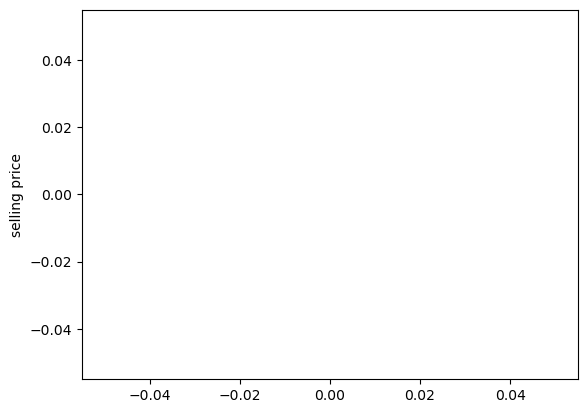

In [79]:
selected_data=car_value_no_null_df[car_value_no_null_df["make"]=="Mercedes-Benz"]
    
#extract odometer and selling price data
x_axis=selected_data["odometer"]
y_axis=selected_data["sellingprice"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# x_axis=selected_data["odometer"]
# y_axis=selected_data["sellingprice"]
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
# regress_values = y_axis/x_axis + intercept

# plt.scatter(x_axis,y_axis)
plt.ylabel("selling price")
# plt.ylim(0,200000)
# plt.xlim(0,400000)

plt.plot(x_axis,regress_values,"r-")


(0.0, 400000.0)

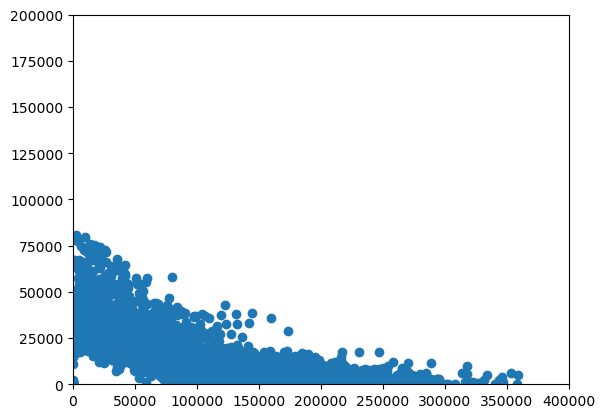

In [67]:
selected_data=car_value_no_null_df[car_value_no_null_df["make"]=="Lexus"]
    
#extract odometer and selling price data
x_axis=selected_data["odometer"]
y_axis=selected_data["sellingprice"]
plt.scatter(x_axis,y_axis)
plt.ylim(0,200000)
plt.xlim(0,400000)

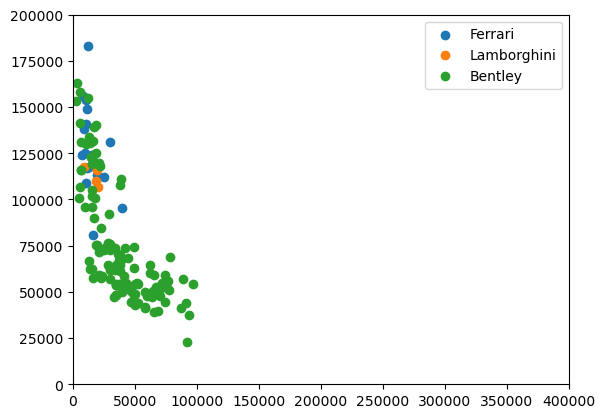

In [20]:
#Graphs of the top three makes in terms of average selling price 
make_list=["Ferrari","Lamborghini","Bentley"]
#create empty list to fill odometer

for make in make_list:

    #filter the dataframe to get data for the selected make
    selected_data=car_value_no_null_df[car_value_no_null_df["make"]==make]
    
    #extract odometer and selling price data
    x_axis=selected_data["odometer"]
    y_axis=selected_data["sellingprice"]
    
    plt.scatter(x_axis,y_axis,label=make)
    plt.ylim(0,200000)
    plt.xlim(0,400000)
    plt.legend()
    plt.show


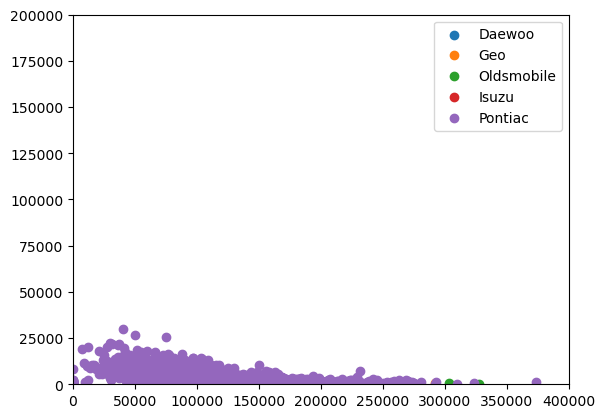

In [21]:
#Graphs of the least three makes in terms of average selling price 
make_list=["Daewoo","Geo","Oldsmobile","Isuzu","Pontiac"]
#create empty list to fill odometer

for make in make_list:

    #filter the dataframe to get data for the selected make
    selected_data=car_value_no_null_df[car_value_no_null_df["make"]==make]
    
    #extract odometer and selling price data
    x_axis=selected_data["odometer"]
    y_axis=selected_data["sellingprice"]
    
    plt.scatter(x_axis,y_axis,label=make)
    plt.ylim(0,200000)
    plt.xlim(0,400000)
    plt.legend()
    plt.show


In [22]:
#put make which have over 10,000 rows into a list 
make_list=["Ford","Chevrolet","Nissan","Toyota","Dodge","Honda","Hyundai","BMW","Kia","Chrysler","Mercedes-Benz","Jeep","Infiniti","Volkswagen","Lexus","GMC"]

#filter the dataframe to get data for the selected make
selected_data=car_value_no_null_df.query('make in @make_list',engine='python')

selected_data

,make,model,condition,odometer,mmr,sellingprice
0,Kia,Sorento,5.0,16639.0,20500.0,21500.0
1,Kia,Sorento,5.0,9393.0,20800.0,21500.0
2,BMW,3 Series,45.0,1331.0,31900.0,30000.0
4,BMW,6 Series Gran Coupe,43.0,2641.0,66000.0,67000.0
5,Nissan,Altima,1.0,5554.0,15350.0,10900.0
...,...,...,...,...,...,...
558831,BMW,5 Series,39.0,66403.0,20300.0,22800.0
558832,Kia,K900,45.0,18255.0,35300.0,33000.0
558834,BMW,X5,48.0,50561.0,29800.0,34000.0
558835,Nissan,Altima,38.0,16658.0,15100.0,11100.0


In [23]:
selected_make_data=selected_data.groupby("make").mean(numeric_only=True)
selected_make_data.sort_values(by="sellingprice",ascending=False)

,condition,odometer,mmr,sellingprice
make,,,,
Mercedes-Benz,32.340660,62415.016746,21940.217899,21590.566828
BMW,33.339915,64297.520660,21575.547806,21441.895748
Infiniti,35.226299,45859.775600,20505.099641,20417.457694
Lexus,32.636395,69228.991906,20370.588483,20286.236827
GMC,31.340502,84536.825464,17055.745312,16951.410534
Jeep,29.653879,69804.496845,15118.042545,15000.244145
Ford,33.168485,63507.202269,14733.775240,14540.469648
Toyota,30.624958,73971.185811,12359.001530,12249.321813
Chevrolet,27.717955,76896.387817,12150.630430,11977.397528


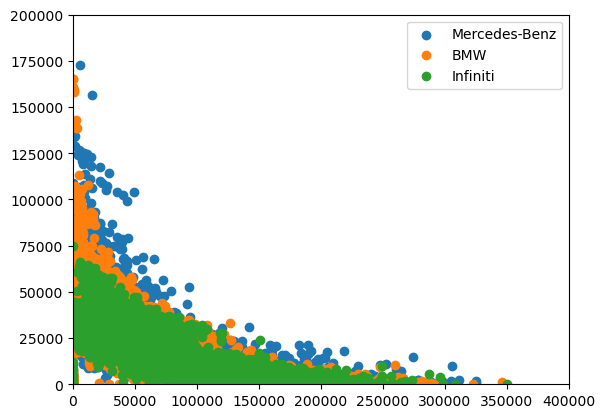

In [24]:
# 3manufacturers with the lowest average selling price#Top 3
make_list=["Mercedes-Benz","BMW","Infiniti"]
#create empty list to fill odometer

for make in make_list:

    #filter the dataframe to get data for the selected make
    selected_data=car_value_no_null_df[car_value_no_null_df["make"]==make]
    
    #extract odometer and selling price data
    x_axis=selected_data["odometer"]
    y_axis=selected_data["sellingprice"]
    
    plt.scatter(x_axis,y_axis,label=make)
    plt.ylim(0,200000)
    plt.xlim(0,400000)
    plt.legend()
    plt.show

In [ ]:
# 

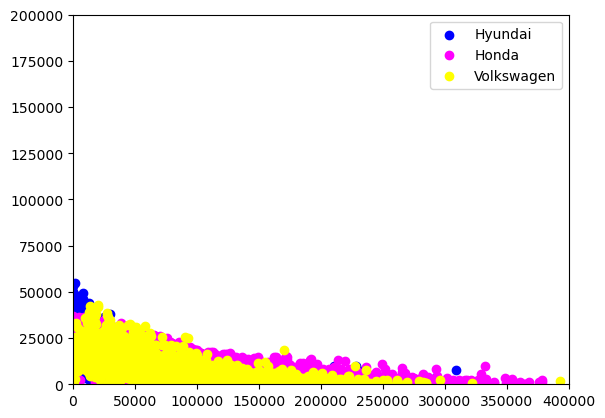

In [25]:
#3 manufacturers with the lowest average selling price
make_list=["Hyundai","Honda","Volkswagen"]
colors=["blue","magenta","yellow"]
#create empty list to fill odometer

for make,color in zip(make_list,colors):

    #filter the dataframe to get data for the selected make
    selected_data=car_value_no_null_df[car_value_no_null_df["make"]==make]
    
    #extract odometer and selling price data
    x_axis=selected_data["odometer"]
    y_axis=selected_data["sellingprice"]
    
    plt.scatter(x_axis,y_axis,label=make,c=color)
    plt.ylim(0,200000)
    plt.xlim(0,400000)
    plt.legend()
    plt.show